### TODOs:

- Train and Test RNNs 
- Train and Test RNNS and LSTMs with windows
- Train and Test RNNs and LSTMs without delays and/or pupil data
- After assessing all of these, do a hyperparameter search to get best model
- See if any of this generalizes to other subjects (big one)

### NTHs: 

- Investigate the strength of the Aaronson Oracle, best window_size, etc.

### Setup

In [1]:
import os, sys
import matplotlib.pyplot as plt
plt.style.use('ggplot')

for module in ['actions', 'models']:
    path = os.path.join(os.getcwd(), '..', module)
    sys.path.append(os.path.abspath(path))

from oracle3 import oracle
from model4 import LSTM4, train4
from model5 import LSTM5, train5
from load_data2 import load_data
from inference2 import inference

### Aaronson Oracle

In [2]:
window_sizes = 5
oracle_results = oracle(window_sizes)


Oracle (window 5)

trial 1 accuracy: 60.23%
trial 2 accuracy: 57.41%
trial 3 accuracy: 61.76%
trial 4 accuracy: 48.28%
trial 5 accuracy: 57.06%
trial 6 accuracy: 53.21%
trial 7 accuracy: 63.58%
trial 8 accuracy: 56.20%
trial 9 accuracy: 56.73%
trial 10 accuracy: 62.77%
trial 11 accuracy: 56.73%

Avg Accuracy: 57.63%



### Train LSTM

In [3]:
full_model = train4(random=False)
partial_model = train5(random=False)

0531-1947

{'batch_size': 140,
 'hidden_size': 75,
 'learning_rate': 0.005,
 'num_epochs': 2,
 'num_stacked_layers': 1}


batch 0 loss: 0.6903687715530396
batch 10 loss: 0.6917626586827365
batch 20 loss: 0.6913962108748299
batch 30 loss: 0.6916925714861962
batch 40 loss: 0.6920642518415684
batch 50 loss: 0.6921627381268669
batch 60 loss: 0.692179334945366
batch 70 loss: 0.6923383902496015
batch 80 loss: 0.6924085749520196
batch 90 loss: 0.6924796012731699
batch 100 loss: 0.6919350175574275
batch 110 loss: 0.6914412658493798
batch 120 loss: 0.6907711447763049
validation loss: 0.6844420794929776


batch 0 loss: 0.6756008267402649
batch 10 loss: 0.6763883449814536
batch 20 loss: 0.6848064490727016
batch 30 loss: 0.6847035750266044
batch 40 loss: 0.6819115499170815
batch 50 loss: 0.6824951873106115
batch 60 loss: 0.6815038968305118
batch 70 loss: 0.6809428712012062
batch 80 loss: 0.6801323287280989
batch 90 loss: 0.680003611596076
batch 100 loss: 0.67924829579816
batch 110 loss: 0.67865911

LSTM5(
  (lstm): LSTM(3, 10, batch_first=True)
  (linear): Linear(in_features=10, out_features=1, bias=True)
  (sigmoid): Sigmoid()
)

### Inference

In [2]:
# 0523-1537
models = ["0531-1947", "0531-1957"]
results = inference(models)

Model 0531-1947

{'batch_size': 140,
 'hidden_size': 75,
 'learning_rate': 0.005,
 'num_epochs': 2,
 'num_stacked_layers': 1}


trial 1 accuracy: 61.36%
trial 2 accuracy: 58.55%
trial 3 accuracy: 47.33%
trial 4 accuracy: 54.00%
trial 5 accuracy: 50.00%
trial 6 accuracy: 52.22%
trial 7 accuracy: 46.07%
trial 8 accuracy: 54.25%
trial 9 accuracy: 61.07%
trial 10 accuracy: 61.27%
trial 11 accuracy: 53.52%

Avg Accuracy: 54.51%

Model 0531-1957

{'batch_size': 100,
 'hidden_size': 10,
 'learning_rate': 0.01,
 'num_epochs': 1,
 'num_stacked_layers': 1,
 'segment_length': 5}


trial 1 accuracy: 59.17%
trial 2 accuracy: 57.84%
trial 3 accuracy: 57.63%
trial 4 accuracy: 54.55%
trial 5 accuracy: 46.86%
trial 6 accuracy: 56.27%
trial 7 accuracy: 50.29%
trial 8 accuracy: 53.33%
trial 9 accuracy: 58.97%
trial 10 accuracy: 62.22%
trial 11 accuracy: 60.19%

Avg Accuracy: 56.12%



{'0531-1947': {'accuracy': 54.51227316853203,
  1: {'accuracies': [100.0,
    100.0,
    100.0,
    100.0,
    80.0,
    83.33333333333333,
    85.71428571428571,
    87.5,
    77.77777777777777,
    80.0,
    81.81818181818181,
    75.0,
    76.92307692307692,
    71.42857142857143,
    73.33333333333333,
    75.0,
    76.47058823529412,
    77.77777777777777,
    78.94736842105263,
    80.0,
    80.95238095238095,
    81.81818181818181,
    82.6086956521739,
    83.33333333333333,
    84.0,
    84.61538461538461,
    85.18518518518519,
    82.14285714285714,
    82.75862068965517,
    83.33333333333333,
    80.64516129032258,
    78.125,
    78.78787878787878,
    79.41176470588235,
    77.14285714285714,
    77.77777777777777,
    75.67567567567568,
    76.3157894736842,
    76.92307692307692,
    77.5,
    78.04878048780488,
    78.57142857142857,
    79.06976744186046,
    77.27272727272727,
    77.77777777777777,
    78.26086956521739,
    78.72340425531915,
    79.16666666666667

### Oracle vs LSTM

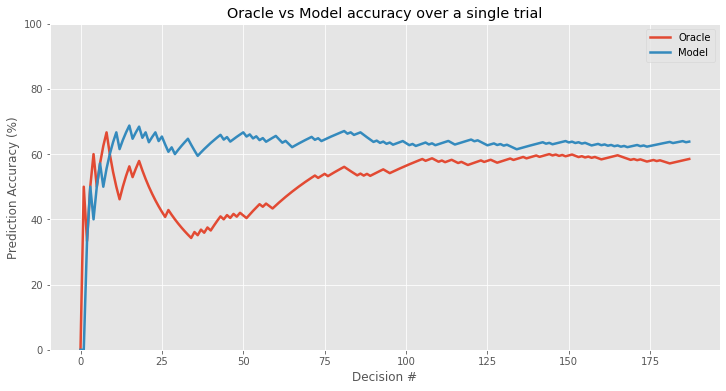

In [9]:
def plot_trial_accuracies(trial, window_size, model_name):
    results = oracle(window_size, logging=False)
    o_accuracies = results[window_size][trial]['accuracies']

    results = inference(model_name, logging=False)
    m_accuracies = results[model_name][trial]['accuracies']
    
    # trim m_accuracies to account for window_size
    m_accuracies = m_accuracies[:-window_size]

    plt.figure(figsize=(12, 6))

    plt.plot(o_accuracies, label='Oracle', lw=2.5)
    plt.plot(m_accuracies, label='Model', lw=2.5)
    plt.title('Oracle vs Model accuracy over a single trial')
    plt.xlabel('Decision (#)')
    plt.ylabel('Prediction Accuracy (%)')
    plt.ylim(0, 100)
    plt.legend()
    plt.show()

plot_trial_accuracies(1, 5, '0523-1537')

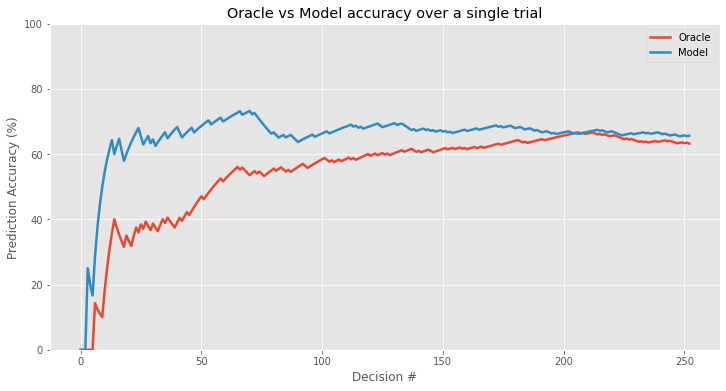

In [10]:
plot_trial_accuracies(2, 5, '0523-1537')

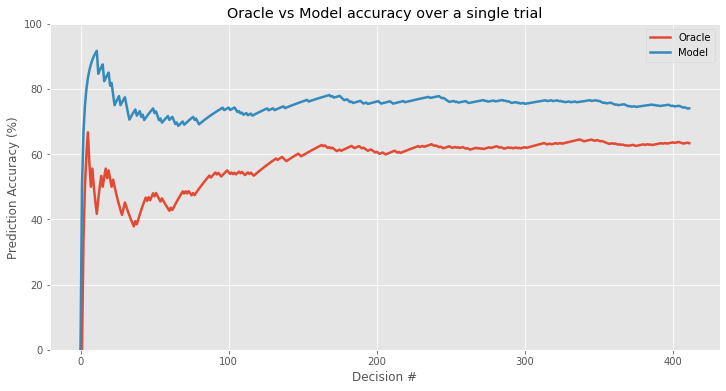

In [11]:
plot_trial_accuracies(5, 5, '0523-1537')